In [2]:
## Plot average rank accross experiments and wall clock for each algorithm

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
cd ..

/home/pierre/git/bo-on-graph


In [5]:
import os
import torch
import pandas as pd
import matplotlib
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt
from copy import deepcopy
matplotlib.rcParams.update({'font.size': 18})
supported_labels = [
    "random",
    "local_search",
    "ei",
    "ei_ego_network_1",
    "ei_ego_network_1_old",
    "dfs",
    "bfs",
    "ei_ego_network_2",
    "ei_ego_network_2_no_ard",
]
# cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))
d_color = {"ei_ego_network_1":"#1f77b4", "ei_ego_network_2":"#8c564b", "random":"#ff7f0e",
           "local_search":"#2ca02c", "dfs": "#d62728", "bfs": "#9467bd", "ei_ego_network_1_old":"#e377c2",
           "ei_ego_network_2_no_ard":"#7f7f7f"}
d_label = {"ei_ego_network_1":"BO_Poly", "ei_ego_network_1_old":"BO_SumInverse",
           "ei_ego_network_2":"BO_Diff_ARD", "ei_ego_network_2_no_ard":"BO_Diff", 
           "random":"Random", "local_search":"Local search", "dfs": "Dfs", "bfs": "Bfs"}



/home/pierre/miniconda3/envs/graph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Wall clock on current experiment

In [7]:
def plot_result_clock(path: str, label: str):
    # path: main directory of experiments (eg. logs/centrality), label : label experiment to plot
    exp_dir = os.path.join(path, label)
    algorithm_name = [name for name in os.listdir(exp_dir) if os.path.isdir(os.path.join(exp_dir, name))]
    algorithm_name = [name for name in algorithm_name if name not in ["dfs", "bfs"]]
    min_max_len = np.inf
    data_over_algorithm = []
    for algorithm in algorithm_name:
        alg_dir = os.path.join(exp_dir, algorithm)
        ## Here are in directory with signal png and pt
        data_path_seeds = [f for f in os.listdir(alg_dir) if ".pt" in f]
        data_over_seeds = []
        for i, df in enumerate(data_path_seeds):
            data_path = os.path.join(alg_dir, df)
            with open(data_path, "rb") as fp:
                data = torch.load(data_path, map_location="cpu")
            y = data["wall_time"]
            y = y[y.nonzero()].squeeze()
            min_max_len = min(min_max_len, y.shape[0])
            data_over_seeds.append(y)
        data_over_algorithm.append(data_over_seeds)
    print("For Experiment " + label)
    for i, alg in enumerate(data_over_algorithm):
        alg = [el[:min_max_len].numpy() for el in alg]
        alg = np.array(alg)
        mean = alg.mean(axis=0)
        std = alg.std(axis=0)
        print(f"Mean std of algorithm {d_label[algorithm_name[i]]}: {mean[-1]} +- {std[-1]}")

In [8]:
path = "./logs/centrality/"
list_experiences = ["ba_betweenness_m-2_ninit-20_n-1000", "ba_betweenness_m-3_ninit-20_n-1000", "ba_betweenness_m-4_ninit-20_n-1000",
                    "ba_eigenvector_centrality_m-2_ninit-20_n-1000", "ba_eigenvector_centrality_m-3_ninit-20_n-1000", "ba_eigenvector_centrality_m-4_ninit-20_n-1000"]
for exp in list_experiences:
    plot_result_clock(path, exp)

path = "./logs/centrality/"
list_experiences = ["ws_betweenness_k-10_p-0.1_ninit-20_n-2000", "ws_betweenness_k-10_p-0.2_ninit-20_n-2000", "ws_betweenness_k-30_p-0.1_ninit-20_n-2000", "ws_betweenness_k-30_p-0.2_ninit-20_n-2000",
                    "ws_eigenvector_centrality_k-10_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-10_p-0.2_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.2_ninit-20_n-2000"]

for exp in list_experiences:
    plot_result_clock(path, exp)

path = "./logs/centrality/"

list_experiences = ["ws_betweenness_k-10_p-0.1_ninit-20_n-2000", "ws_betweenness_k-10_p-0.2_ninit-20_n-2000", "ws_betweenness_k-30_p-0.1_ninit-20_n-2000", "ws_betweenness_k-30_p-0.2_ninit-20_n-2000",
                    "ws_eigenvector_centrality_k-10_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-10_p-0.2_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.2_ninit-20_n-2000"]

path = "./logs/teams/"
list_experiences = ["jaccard_n_skills-2_alpha-0.1_n_individuals-10_threshold-0.1", "jaccard_n_skills-2_alpha-1_n_individuals-10_threshold-0.1", "jaccard_n_skills-2_alpha-10_n_individuals-10_threshold-0.1",
                    "jaccard_n_skills-4_alpha-0.1_n_individuals-10_threshold-0.1", "jaccard_n_skills-4_alpha-1_n_individuals-10_threshold-0.1", "jaccard_n_skills-4_alpha-10_n_individuals-10_threshold-0.1",
                    "jaccard_n_skills-8_alpha-0.1_n_individuals-10_threshold-0.1", "jaccard_n_skills-8_alpha-1_n_individuals-10_threshold-0.1", "jaccard_n_skills-8_alpha-10_n_individuals-10_threshold-0.1"]
for exp in list_experiences:
    plot_result_clock(path, exp)

path = "./logs/testfunction/"
list_experiences = ["ackley_noise-0.5_n-1000", "ackley_noise-1.0_n-1000",
                    "rosenbrock_noise-0.5_n-1000", "rosenbrock_noise-1.0_n-1000"]

for exp in list_experiences:
    plot_result_clock(path, exp)

path = "./logs/diffusion_real/"
list_experiences = ["beta-0.1_gamma-0.015_fracinfect-3e-4", "beta-0.1_gamma-0.15_fracinfect-3e-4",
                    "beta-0.2_gamma-0.015_fracinfect-3e-4", "beta-0.2_gamma-0.15_fracinfect-3e-4"]

for exp in list_experiences:
    plot_result_clock(path, exp)

For Experiment ba_betweenness_m-2_ninit-20_n-1000
Mean std of algorithm BO_SumInverse: 29.264904022216797 +- 1.3328205347061157
Mean std of algorithm BO_Diff_ARD: 24.869043350219727 +- 0.5050485730171204
Mean std of algorithm Random: 0.19239147007465363 +- 0.0019250491168349981
Mean std of algorithm BO_Poly: 28.708541870117188 +- 2.4780113697052
Mean std of algorithm Local search: 0.20474939048290253 +- 0.0017029907321557403
Mean std of algorithm BO_Diff: 28.284143447875977 +- 2.3617334365844727
For Experiment ba_betweenness_m-3_ninit-20_n-1000
Mean std of algorithm BO_SumInverse: 29.31951904296875 +- 0.7640535831451416
Mean std of algorithm BO_Diff_ARD: 25.261672973632812 +- 0.6995856761932373
Mean std of algorithm Random: 0.1919238567352295 +- 0.0024650203995406628
Mean std of algorithm BO_Poly: 29.830821990966797 +- 1.3897571563720703
Mean std of algorithm Local search: 0.20266394317150116 +- 0.004101040307432413
Mean std of algorithm BO_Diff: 29.331729888916016 +- 1.831112623214721

In [ ]:
list_experiences = ["ws_betweenness_k-10_p-0.1_ninit-20_n-2000", "ws_betweenness_k-10_p-0.2_ninit-20_n-2000", "ws_betweenness_k-30_p-0.1_ninit-20_n-2000", "ws_betweenness_k-30_p-0.2_ninit-20_n-2000",
                    "ws_eigenvector_centrality_k-10_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-10_p-0.2_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.2_ninit-20_n-2000"]

In [ ]:
list_experiences = ["jaccard_n_skills-2_alpha-0.1_n_individuals-10_threshold-0.1", "jaccard_n_skills-2_alpha-1_n_individuals-10_threshold-0.1", "jaccard_n_skills-2_alpha-10_n_individuals-10_threshold-0.1",
                    "jaccard_n_skills-4_alpha-0.1_n_individuals-10_threshold-0.1", "jaccard_n_skills-4_alpha-1_n_individuals-10_threshold-0.1", "jaccard_n_skills-4_alpha-10_n_individuals-10_threshold-0.1",
                    "jaccard_n_skills-8_alpha-0.1_n_individuals-10_threshold-0.1", "jaccard_n_skills-8_alpha-1_n_individuals-10_threshold-0.1", "jaccard_n_skills-8_alpha-10_n_individuals-10_threshold-0.1"]

In [ ]:
list_experiences = ["jaccard_n_skills-2_alpha-0.1_n_individuals-10_threshold-0.2", "jaccard_n_skills-2_alpha-1_n_individuals-10_threshold-0.2", "jaccard_n_skills-2_alpha-10_n_individuals-10_threshold-0.2",
                    "jaccard_n_skills-4_alpha-0.1_n_individuals-10_threshold-0.2", "jaccard_n_skills-4_alpha-1_n_individuals-10_threshold-0.2", "jaccard_n_skills-4_alpha-10_n_individuals-10_threshold-0.2",
                    "jaccard_n_skills-8_alpha-0.1_n_individuals-10_threshold-0.2", "jaccard_n_skills-8_alpha-1_n_individuals-10_threshold-0.2", "jaccard_n_skills-8_alpha-10_n_individuals-10_threshold-0.2"]

In [ ]:
# path: main directory of experiments (eg. logs/centrality), label : label experiment to plot
exp_dir = os.path.join(path, label)
algorithm_name = [name for name in os.listdir(exp_dir) if os.path.isdir(os.path.join(exp_dir, name))]
min_max_len = np.inf
for algorithm in algorithm_name:
    alg_dir = os.path.join(exp_dir, algorithm)
    ## Here are in directory with signal png and pt
    plot_kwargs = deepcopy(plot_kwargs) or {}
    data_path_seeds = [f for f in os.listdir(alg_dir) if ".pt" in f]
    data_over_seeds = []
    for i, df in enumerate(data_path_seeds):
        data_path = os.path.join(alg_dir, df)
        with open(data_path, "rb") as fp:
            data = torch.load(data_path, map_location="cpu")
            minimize = False
        y = data["wall_time"]
        y = y[y.nonzero()].squeeze()
        data_over_seeds.append(y)
    n_data_per_trial = np.array([len(d) for d in data_over_seeds])
    max_len = max(n_data_per_trial)
    if len(np.unique(n_data_per_trial)) > 1:
        # pad as appropriate
        for i, d in enumerate(data_over_seeds):
            data_over_seeds[i] = np.concatenate((
                d, d[-1] * np.ones(max_len - d.shape[0])))
    all_data = np.array(data_over_seeds)
    if cumulative:
        y = pd.DataFrame(all_data).cummax(axis=1)
    else:
        y = pd.DataFrame(all_data)
    x = np.arange(all_data.shape[1])
    if median:
        mean = y.median(axis=0)
        lb = y.quantile(q=0.25, axis=0)
        ub = y.quantile(q=0.75, axis=0)
    elif std:
        mean = y.mean(axis=0)
        # standard error
        lb = mean - y.std(axis=0)
        ub = mean + y.std(axis=0)
    else:
        mean = y.mean(axis=0)
        # standard error
        lb = mean - y.std(axis=0) / np.sqrt(all_data.shape[0])
        ub = mean + y.std(axis=0) / np.sqrt(all_data.shape[0])
    if minimize:
        mean = -mean
        lb = -lb
        ub = -ub
    ax.plot(x, mean, ".-", label=d_label[algorithm], color=d_color[algorithm], **plot_kwargs)
    if "alpha" in plot_kwargs.keys():
        del plot_kwargs["alpha"]
    if "markevery" in plot_kwargs.keys():
        del plot_kwargs["markevery"]
    ax.fill_between(x, lb, ub, alpha=0.1, color=d_color[algorithm], **plot_kwargs)
    min_max_len = min(min_max_len, max_len)
#ax.legend()
ax.set_xlabel(r"\#Iters")
ax.set_ylabel("Regret")
ax.set_xlim([0, min_max_len])
ax.grid()
#plt.yscale("log")

#plt.savefig(os.path.join(exp_dir, "plot_result_regretpng.png"), bbox_inches='tight')
#plt.savefig(os.path.join(exp_dir, "plot_result_regretpdf.pdf"), bbox_inches='tight')
#plt.clf()
#return y, max_len

In [ ]:
list_experiences = ["ba_betweenness_m-2_ninit-20_n-1000", "ba_betweenness_m-3_ninit-20_n-1000", "ba_betweenness_m-4_ninit-20_n-1000",
                    "ba_eigenvector_centrality_m-2_ninit-20_n-1000", "ba_eigenvector_centrality_m-3_ninit-20_n-1000", "ba_eigenvector_centrality_m-4_ninit-20_n-1000"]
n_rows, n_cols = 2, 3
#fig, axs = plt.subplots(n_rows, n_cols, layout='constrained', figsize=(20, 8))
fig, axs = plt.subplots(n_rows, n_cols, layout='constrained', figsize=(20, 8))
for i, experience in enumerate(list_experiences):
    idx_row, idx_col = i // n_cols, i % n_cols
    print(idx_row, idx_col)
    plot_result(axs[idx_row, idx_col], "./logs/centrality/", list_experiences[i], std=False)

handles, labels = axs[idx_row, idx_col].get_legend_handles_labels()
change_labels = [2, 6, 7, 4, 5, 1, 3, 0]
labels = [labels[i] for i in change_labels]
handles = [handles[i] for i in change_labels]
#fig.legend(handles, labels, loc='center')
axs[0, 0].title.set_text('(a) Betweenness Centrality with ' + r'$m = 2$')
axs[0, 1].title.set_text('(b) Betweenness Centrality with ' + r'$m = 3$')
axs[0, 2].title.set_text('(c) Betweenness Centrality with ' + r'$m = 4$')
axs[1, 0].title.set_text('(d) Eigenvector Centrality with ' + r'$m = 2$')
axs[1, 1].title.set_text('(e) Eigenvector Centrality with ' + r'$m = 3$')
axs[1, 2].title.set_text('(f) Eigenvector Centrality with ' + r'$m = 4$')
#axs[1, 1].legend(handles = handles , labels=labels,loc='upper center', 
#             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=4)
fig.legend(handles = handles , labels=labels,loc='upper center', 
             bbox_to_anchor=(0.5, 0.),fancybox=False, shadow=False, ncol=8)
plt.legend()
plt.show()

# Wall clock influence ith graph size trust region vs. no trust regions

For each algorithm:
- Aggregate mean std clock time vs. graph node size

In [10]:
algorithm_names = ["ei_ego_network_1", "ei_ego_network_1_old", "ei_ego_network_2_no_ard"]
d_algorithm_tr = {name:{} for name in algorithm_names} ### Dictionary mapping algorithm to dictionary mapping graph size and clock time stats
d_algorithm_full = {name:{} for name in algorithm_names} ### Dictionary mapping algorithm to dictionary mapping graph size and clock time stats
def plot_result_clock(path: str):
    # path: main directory of experiments (eg. logs/centrality), label : label experiment to plot
    experiment_name = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
    min_max_len = np.inf
    for exp in experiment_name:
        experiment_path = os.path.join(path, exp)
        graph_size = int(exp[30:34])
        tr_size = int(exp[48:])
        for algorithm in algorithm_names:
            alg_dir = os.path.join(experiment_path, algorithm)
            ## Here are in directory with signal png and pt
            data_path_seeds = [f for f in os.listdir(alg_dir) if ".pt" in f]
            data_over_seeds = []
            for i, df in enumerate(data_path_seeds):
                data_path = os.path.join(alg_dir, df)
                with open(data_path, "rb") as fp:
                    data = torch.load(data_path, map_location="cpu")
                y = data["wall_time"]
                y = y[y.nonzero()].squeeze()
                min_max_len = min(min_max_len, y.shape[0])
                data_over_seeds.append(y)
            if tr_size == 0:
                d_algorithm_full[algorithm][graph_size] =  data_over_seeds
            else:
                d_algorithm_tr[algorithm][graph_size] =  data_over_seeds

    for algo_name in d_algorithm_tr:
        for graph_s in d_algorithm_tr[algo_name]:
            for i in range(len(d_algorithm_tr[algo_name][graph_s])):
                d_algorithm_tr[algo_name][graph_s][i] = d_algorithm_tr[algo_name][graph_s][i][min_max_len-1].numpy()
            d_algorithm_tr[algo_name][graph_s] = np.array(d_algorithm_tr[algo_name][graph_s])
            sq_tr = np.sqrt(d_algorithm_tr[algo_name][graph_s].shape[0])
            mean_tr = d_algorithm_tr[algo_name][graph_s].mean(axis=0)
            std_tr = d_algorithm_tr[algo_name][graph_s].std(axis=0)
            d_algorithm_tr[algo_name][graph_s] = [mean_tr, std_tr, sq_tr]


            for i in range(len(d_algorithm_full[algo_name][graph_s])):
                d_algorithm_full[algo_name][graph_s][i] = d_algorithm_full[algo_name][graph_s][i][min_max_len-1].numpy()
            d_algorithm_full[algo_name][graph_s] = np.array(d_algorithm_full[algo_name][graph_s])
            sq = np.sqrt(d_algorithm_full[algo_name][graph_s].shape[0])
            mean_full = d_algorithm_full[algo_name][graph_s].mean(axis=0)
            std_full = d_algorithm_full[algo_name][graph_s].std(axis=0)
            d_algorithm_full[algo_name][graph_s] = [mean_full, std_full, sq]

    fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(10, 6))
    graph_s_list = [1000, 1500, 2000, 2500, 3000, 3500, 4000]
    for algo_name in algorithm_names:
        x, mean, lb, ub = [], [], [], []
        for graph_s in graph_s_list:
            x.append(graph_s)
            mean.append(d_algorithm_tr[algo_name][graph_s][0])
            #lb.append(d_algorithm_tr[algo_name][graph_s][0] - d_algorithm_tr[algo_name][graph_s][1] / d_algorithm_tr[algo_name][graph_s][2])
            #ub.append(d_algorithm_tr[algo_name][graph_s][0] + d_algorithm_tr[algo_name][graph_s][1] / d_algorithm_tr[algo_name][graph_s][2])
            lb.append(d_algorithm_tr[algo_name][graph_s][0] - d_algorithm_tr[algo_name][graph_s][1])
            ub.append(d_algorithm_tr[algo_name][graph_s][0] + d_algorithm_tr[algo_name][graph_s][1])
        ax.plot(x, mean, "-", label=d_label[algo_name] + " trust region", color=d_color[algo_name] )
        print(x)
        print(lb)
        print(ub)
        ax.fill_between(x, lb, ub, alpha=0.1, color=d_color[algo_name])
        
        x, mean, lb, ub = [], [], [], []
        for graph_s in graph_s_list:
            x.append(graph_s)
            mean.append(d_algorithm_full[algo_name][graph_s][0])
            #lb.append(d_algorithm_full[algo_name][graph_s][0] - d_algorithm_full[algo_name][graph_s][1] / d_algorithm_full[algo_name][graph_s][2])
            #ub.append(d_algorithm_full[algo_name][graph_s][0] + d_algorithm_full[algo_name][graph_s][1] / d_algorithm_full[algo_name][graph_s][2])
            lb.append(d_algorithm_tr[algo_name][graph_s][0] - d_algorithm_tr[algo_name][graph_s][1])
            ub.append(d_algorithm_tr[algo_name][graph_s][0] + d_algorithm_tr[algo_name][graph_s][1])
        ax.plot(x, mean, ".-", label=d_label[algo_name] + " full graph", color=d_color[algo_name] )
        ax.fill_between(x, lb, ub, alpha=0.1, color=d_color[algo_name])
        ax.set_xlabel("Graph Size")
        ax.set_ylabel("Time complexity in seconds")
        ax.legend()
    print(d_algorithm_full)
    plt.savefig("time_complexity.pdf", bbox_inches='tight')


[1000, 1500, 2000, 2500, 3000, 3500, 4000]
[6.556152, 6.493594, 6.4663057, 6.5060253, 6.3735685, 6.4575, 6.5624294]
[6.6826615, 6.663947, 6.5981226, 6.61372, 6.5098286, 6.5702157, 6.5624294]
[1000, 1500, 2000, 2500, 3000, 3500, 4000]
[6.6977844, 6.7191277, 6.6671963, 6.7404323, 6.7053213, 6.6925235, 6.7883325]
[6.8157015, 6.8105793, 6.763706, 6.8382783, 6.808978, 6.7867036, 6.7883325]
[1000, 1500, 2000, 2500, 3000, 3500, 4000]
[6.3588104, 6.4400616, 6.3118877, 6.3662863, 6.4135523, 6.370979, 6.5433617]
[6.5187283, 6.6083317, 6.452899, 6.538125, 6.539501, 6.475782, 6.5433617]
{'ei_ego_network_1': {1500: [38.489254, 0.6924122, 3.1622776601683795], 1000: [20.141617, 0.25424176, 3.1622776601683795], 4500: [381.87216, 0.0, 1.0], 4000: [304.32083, 0.0, 1.0], 2000: [66.748634, 1.6552414, 3.1622776601683795], 5000: [2355.1028, 0.0, 1.0], 2500: [107.12663, 1.5901272, 3.1622776601683795], 3000: [158.79463, 2.196662, 3.1622776601683795], 3500: [219.46367, 2.8134525, 3.1622776601683795]}, 'ei_ego_

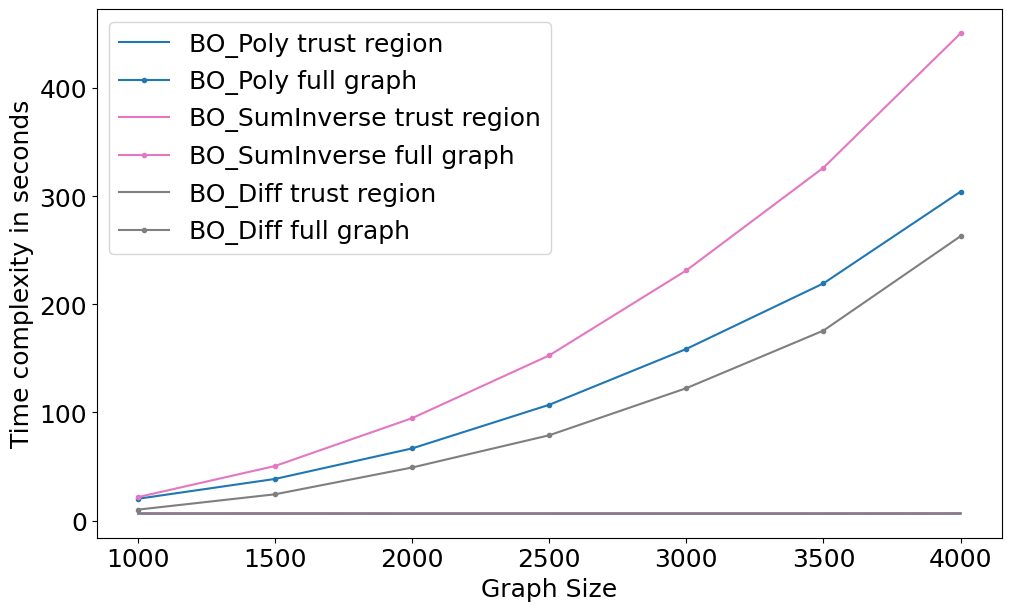

In [11]:
path = "./logs/clock/"
plot_result_clock(path)

In [81]:
torch.load("./logs/clock/ba_betweenness_m-4_ninit-20_n-1500_contextnodes-0/ei_ego_network_2_no_ard/0000_ei_ego_network_2_no_ard.pt", map_location="cpu")["wall_time"]

tensor([ 0.4898,  0.8621,  1.3108,  1.7459,  2.1800,  2.6127,  3.0586,  3.5436,
         3.9472,  4.3449,  4.7466,  5.1941,  5.6401,  6.1606,  6.6210,  7.1214,
         7.6165,  8.0670,  8.4952,  8.9563,  9.4163,  9.8917, 10.3634, 10.8489,
        11.3231, 11.9096, 12.3575, 12.8316, 13.3156, 13.8069, 14.2562, 14.6864,
        15.1250, 15.5804, 16.0744, 16.5929, 17.1261, 17.6013, 18.0743, 18.5451,
        19.0203, 19.5033, 19.9830, 20.4608, 20.9541, 21.4491, 21.9364, 22.4321,
        22.9323, 23.6123, 24.1048, 24.6251, 25.1537, 25.6955, 26.2770, 26.7653,
        27.2694, 27.7983, 28.3372, 28.8617, 29.3557, 29.8524, 30.3576, 30.8970,
        31.4597, 32.0595, 32.6574, 33.2598, 33.8493, 34.4148, 34.9801, 34.9810,
        35.7787, 36.4130, 37.0128, 37.6474, 38.2880, 38.9314, 39.5752, 40.1791,
        40.7934, 41.3647,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

In [86]:
torch.load("./logs/clock/ba_betweenness_m-4_ninit-20_n-3500_contextnodes-100/ei_ego_network_2/0000_ei_ego_network_2.pt", map_location="cpu")["wall_time"]

tensor([0.1064, 0.2119, 0.3321, 0.4544, 0.5746, 0.6953, 0.8160, 0.9369, 1.0575,
        1.1793, 1.3023, 1.4803, 1.6026, 1.7238, 1.8453, 1.9677, 2.0897, 2.2113,
        2.3349, 2.4590, 2.5834, 2.7083, 2.8330, 2.9581, 3.0830, 3.2080, 3.3335,
        3.4590, 3.5847, 3.7125, 3.8377, 3.9628, 4.0880, 4.0887, 4.2134, 4.3350,
        4.4610, 4.5860, 4.7108, 4.8351, 4.9595, 5.0841, 5.2086, 5.3423, 5.4678,
        5.5939, 5.7202, 5.8455, 5.9706, 6.0957, 6.2212, 6.3483, 6.4740, 6.6000,
        6.7262, 6.8524, 6.9794, 7.1073, 7.2349, 7.3639, 7.4925, 7.6213, 7.7496,
        7.8779, 8.0066, 8.1358, 8.1365, 8.2627, 8.3863, 8.5091, 8.6313, 8.7533,
        8.8759, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

# Average rank on current experiments

In [4]:
algorithm_names = ["bfs", "dfs", "ei_ego_network_1", "ei_ego_network_1_old", "ei_ego_network_2", "ei_ego_network_2_no_ard", "local_search", "random"]
N_SEED, N_ITER = 10, 100
def plot_result(list_experiences):
    d_algorithm = {name:np.empty((0,N_SEED, N_ITER)) for name in algorithm_names}
    for el in list_experiences:
        path, list_label = el[0], el[1]
        # list_label contains the list of experiments in path
        for label in list_label:
            experiment_dict = {name:np.array([]) for name in algorithm_names}
            # path: main directory of experiments (eg. logs/centrality), label : label experiment to plot
            exp_dir = os.path.join(path, label)
            for algorithm in algorithm_names:
                alg_dir = os.path.join(exp_dir, algorithm)
                ## Here are in directory with signal png and pt
                data_path_seeds = sorted([f for f in os.listdir(alg_dir) if ".pt" in f])
                data_over_seeds = []
                for i, df in enumerate(data_path_seeds):
                    data_path = os.path.join(alg_dir, df)
                    data = torch.load(data_path, map_location="cpu")
                    assert "Y" in data.keys()
                    y = data["Y"].numpy().flatten()
                    data_over_seeds.append(y)
                #max_len = max(n_data_per_trial)
                max_len = N_ITER
                for i, d in enumerate(data_over_seeds):
                    if d.shape[0] < max_len:
                        data_over_seeds[i] = np.concatenate((d, d[-1] * np.ones(max_len - d.shape[0])))
                    elif d.shape[0] > max_len:
                        data_over_seeds[i] = d[:max_len]
                all_data = np.array(data_over_seeds)
                y = pd.DataFrame(all_data).cummax(axis=1).to_numpy()
                experiment_dict[algorithm] = y
            
            ### Concatenate here
            for i, alg_name in enumerate(algorithm_names):
                d_algorithm[alg_name] = np.vstack((d_algorithm[alg_name], [experiment_dict[alg_name]])) # contains, for each algo, (n_exp) x n_seed x n_iter tensors
    
    ## Take mean std
    s = d_algorithm[algorithm_names[0]].shape
    tensor_to_rank = np.empty((0, s[0]*s[1], s[2]))
    for alg_name in algorithm_names:
        values = d_algorithm[alg_name]
        values = values.reshape(-1, values.shape[-1]) #averaging accross seeds and experiments 
        tensor_to_rank = np.vstack((tensor_to_rank, [values]))
    rank_tensor = rankdata(-tensor_to_rank, axis=0)
    mean = rank_tensor.mean(axis=1)
    lb = mean - rank_tensor.std(axis=1)/np.sqrt(rank_tensor.shape[1])
    ub = mean + rank_tensor.std(axis=1)/np.sqrt(rank_tensor.shape[1])
    for i, alg_name in enumerate(algorithm_names):
        d_algorithm[alg_name] = [mean[i], lb[i], ub[i]]
    return d_algorithm

In [5]:
path1 = "./logs/centrality/"
list_experiences1 = ["ba_betweenness_m-2_ninit-20_n-1000", "ba_betweenness_m-3_ninit-20_n-1000", "ba_betweenness_m-4_ninit-20_n-1000",
                    "ba_eigenvector_centrality_m-2_ninit-20_n-1000", "ba_eigenvector_centrality_m-3_ninit-20_n-1000", "ba_eigenvector_centrality_m-4_ninit-20_n-1000"] + ["ws_betweenness_k-10_p-0.1_ninit-20_n-2000", "ws_betweenness_k-10_p-0.2_ninit-20_n-2000", "ws_betweenness_k-30_p-0.1_ninit-20_n-2000", "ws_betweenness_k-30_p-0.2_ninit-20_n-2000",
                    "ws_eigenvector_centrality_k-10_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-10_p-0.2_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.1_ninit-20_n-2000", "ws_eigenvector_centrality_k-30_p-0.2_ninit-20_n-2000"] + ["real_enron_degree_centrality_contextnodes-100_n_init-20", "real_fb_degree_centrality_contextnodes-100_n_init-20", "real_twitch_degree_centrality_contextnodes-100_n_init-20"]


path2 = "./logs/teams/"
list_experiences2 = ["jaccard_n_skills-2_alpha-1_n_individuals-10_threshold-0.3", "jaccard_n_skills-2_alpha-10_n_individuals-10_threshold-0.3", "jaccard_n_skills-4_alpha-1_n_individuals-10_threshold-0.3", "jaccard_n_skills-4_alpha-10_n_individuals-10_threshold-0.3"]


path3 = "./logs/testfunction/"
list_experiences3 = ["ackley_noise-0.5_n-1000", "ackley_noise-1.0_n-1000",
                    "rosenbrock_noise-0.5_n-1000", "rosenbrock_noise-1.0_n-1000"]

path4 = "./logs/diffusion_real/"
list_experiences4 = ["beta-0.1_gamma-0.015_fracinfect-3e-4", "beta-0.1_gamma-0.15_fracinfect-3e-4",
                    "beta-0.2_gamma-0.015_fracinfect-3e-4", "beta-0.2_gamma-0.15_fracinfect-3e-4"]

argument = [[path1, list_experiences1], [path2, list_experiences2], [path3, list_experiences3], [path4, list_experiences4]]

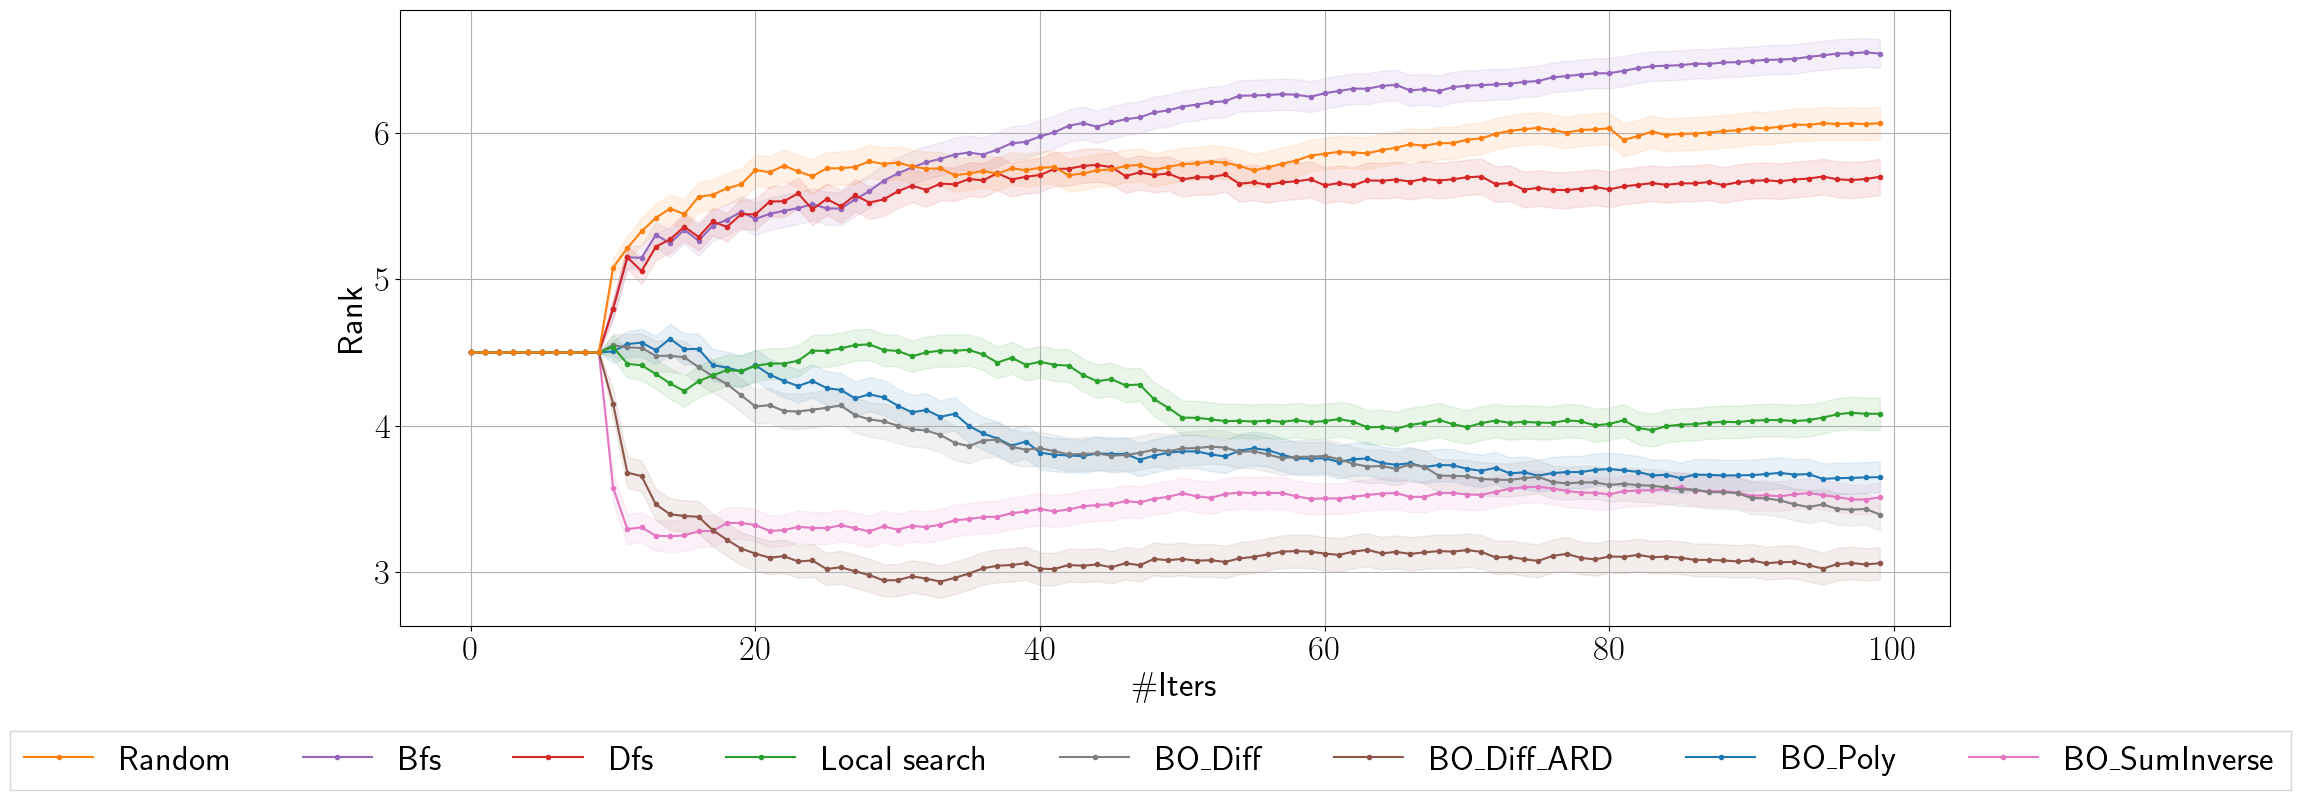

' \n#fig.legend(handles, labels, loc=\'center\')\naxs[0].title.set_text(\'(a) Influential node; Enron Mail network\')\n#axs[0, 0].set_yscale("log")\naxs[1].title.set_text(\'(b) Influential node; Facebook pages network\')\n#axs[0, 1].set_yscale("log")\naxs[2].title.set_text(\'(c) Influential node; Twitch user social network\')\n#axs[0, 2].set_yscale("log")\n#axs[1, 1].legend(handles = handles , labels=labels,loc=\'upper center\', \n#             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=4)\n\n#plt.legend()\n#plt.show()\nplt.savefig("centrality_real_rows.pdf", bbox_inches=\'tight\') '

In [7]:
plt.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 25})

d_algorithm = plot_result(argument)
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(N_ITER)
for alg in algorithm_names:
    result_algo = d_algorithm[alg]
    ax.plot(x, result_algo[0], ".-", label=d_label[alg], color=d_color[alg])
    ax.fill_between(x, result_algo[1], result_algo[2], alpha=0.1, color=d_color[alg])

handles, labels = ax.get_legend_handles_labels()
change_labels = [7, 0, 1, 6, 5, 4, 2, 3]
labels = [labels[i] for i in change_labels]
handles = [handles[i] for i in change_labels]
ax.set_xlabel(r"\#Iters")
ax.set_ylabel("Rank")
ax.grid()
fig.legend(handles = handles , labels=labels,loc='upper center', 
             bbox_to_anchor=(0.5, 0.),fancybox=False, shadow=False, ncol=8)
#plt.savefig("ranking_experiments.pdf", bbox_inches='tight')
plt.show()




""" 
#fig.legend(handles, labels, loc='center')
axs[0].title.set_text('(a) Influential node; Enron Mail network')
#axs[0, 0].set_yscale("log")
axs[1].title.set_text('(b) Influential node; Facebook pages network')
#axs[0, 1].set_yscale("log")
axs[2].title.set_text('(c) Influential node; Twitch user social network')
#axs[0, 2].set_yscale("log")
#axs[1, 1].legend(handles = handles , labels=labels,loc='upper center', 
#             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=4)

#plt.legend()
#plt.show()
plt.savefig("centrality_real_rows.pdf", bbox_inches='tight') """

Compute graph for team optimization

## Sample Jaccard Graph

In [12]:
from email.mime import base
from time import time

import networkx as nx
import torch
from typing import Optional, Dict, Any
import numpy as np
from problems import get_synthetic_problem
import random
from search.models import initialize_model, get_acqf, optimize_acqf
from search.utils import (
    prune_baseline,
    generate_neighbors,
    Plot_animation,
    get_context_graph,
    eigendecompose_laplacian,
)
from search.trust_region import (
    update_state,
    restart,
)
import os
from botorch.utils.transforms import standardize
import matplotlib.pyplot as plt

In [66]:
problem_settings = {"random_graph_type": "jaccard", "n_skills": 2, "alpha": 0.01, "n_individuals": 6, "threshold": 0.5}
base_function = get_synthetic_problem("team_opt", seed=0, problem_kwargs=problem_settings)
G = base_function.context_graph
G.remove_node(0)

/tmp/ipykernel_12911/1464835696.py:21: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


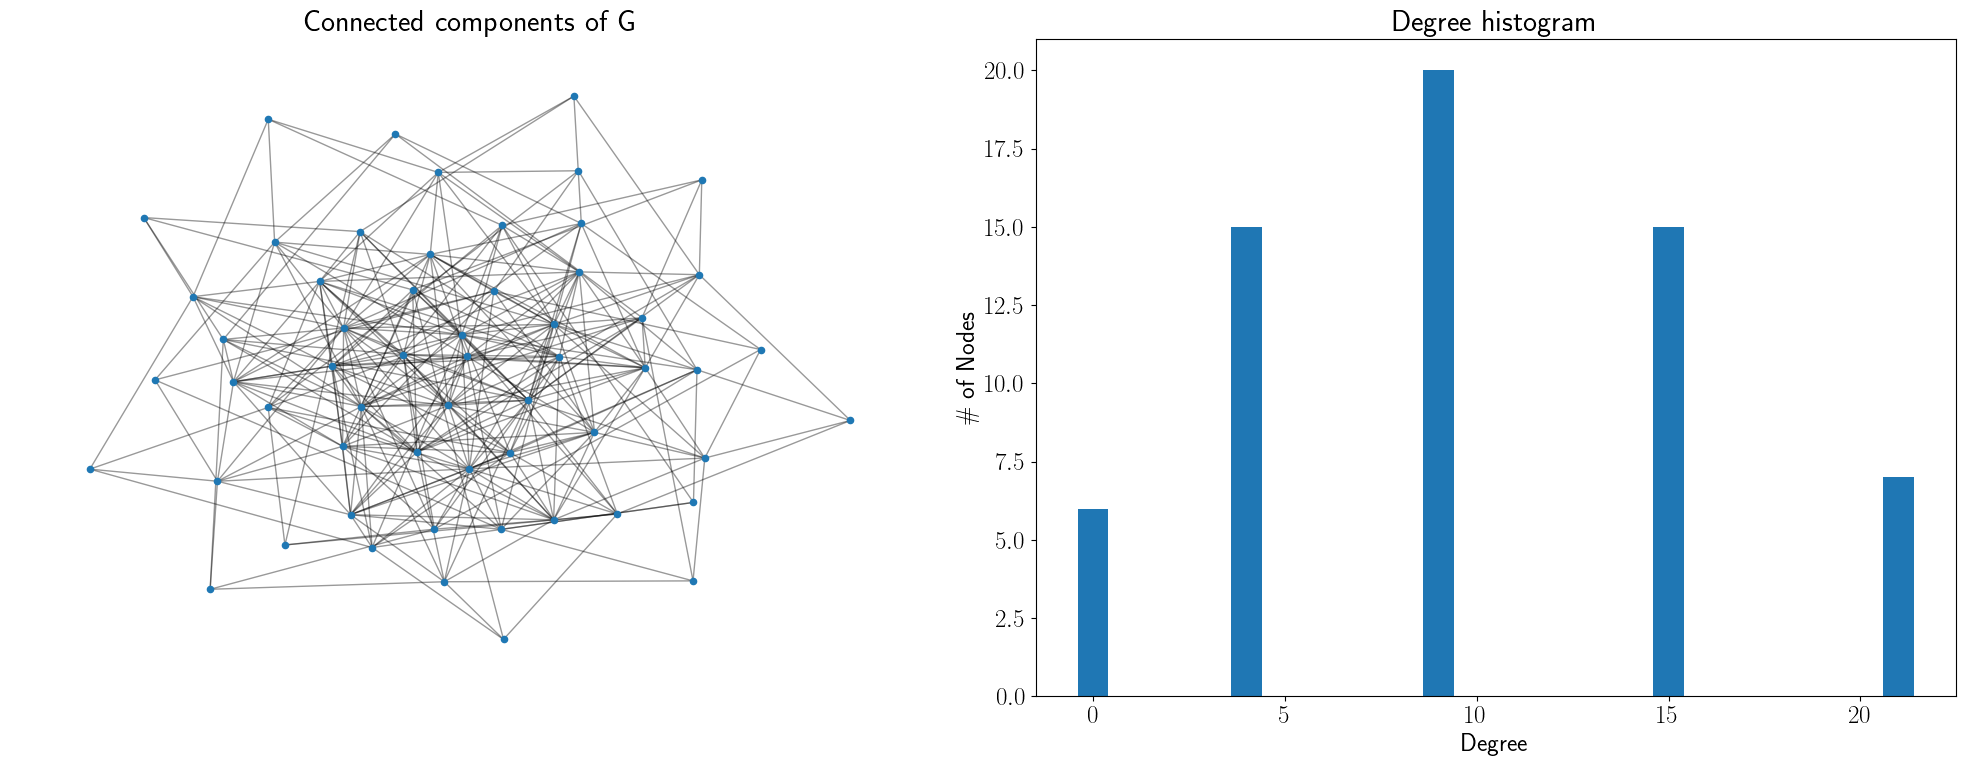

In [74]:

plt.rcParams['text.usetex'] = True

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig, axes = plt.subplots(1,2, layout='constrained', figsize=(20, 8))


Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
pos = nx.kamada_kawai_layout(Gcc)
nx.draw_networkx_nodes(Gcc, pos, ax=axes[0], node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=axes[0], alpha=0.4)
axes[0].set_title("Connected components of G")
axes[0].set_axis_off()
axes[1].bar(*np.unique(degree_sequence, return_counts=True))
axes[1].set_title("Degree histogram")
axes[1].set_xlabel("Degree")
axes[1].set_ylabel(r"\# of Nodes")

fig.tight_layout()
plt.savefig("Jaccard_sample.pdf", bbox_inches='tight')